In [1]:
# Import what we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get data
df = pd.read_csv('us_perm_visas.csv')
df.info()

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,6,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205533 entries, 0 to 205532
Data columns (total 13 columns):
case_status                205533 non-null object
agent_state                58961 non-null object
case_received_date_YEAR    70261 non-null float64
class_of_admission         194690 non-null object
country_of_citizenship     205503 non-null object
employer_state             205511 non-null object
application_type           135269 non-null object
decision_date              205533 non-null object
education_level            70258 non-null object
job_major                  64085 non-null object
economic_sector            129068 non-null object
ctc                        205476 non-null object
ctc_unit                   160716 non-null object
dtypes: float64(1), object(12)
memory usage: 20.4+ MB


In [3]:
# Replace Nas with strings
missing_term = ['cs', 'as', 'crdy', 'coa', 'coc', 'es', 'at', 'dd', 'el', 'jm', 'es', 'ctc', 'ctcu']
for i in range(13):
    df.iloc[:,i].fillna('missing'+missing_term[i], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205533 entries, 0 to 205532
Data columns (total 13 columns):
case_status                205533 non-null object
agent_state                205533 non-null object
case_received_date_YEAR    205533 non-null object
class_of_admission         205533 non-null object
country_of_citizenship     205533 non-null object
employer_state             205533 non-null object
application_type           205533 non-null object
decision_date              205533 non-null object
education_level            205533 non-null object
job_major                  205533 non-null object
economic_sector            205533 non-null object
ctc                        205533 non-null object
ctc_unit                   205533 non-null object
dtypes: object(13)
memory usage: 20.4+ MB


In [5]:
# Replace Class of admission values such that there are only two values (H-1B and Other)
df = df[df['case_status'] != 'Withdrawn']
df['case_status'].astype(np.int64)

def class_of_admission(x):
    x = str(x)
    if x == 'H-1B' or x =='H1B':
        return 'H-1B'
    else:
        return 'other_coa'
    
df['class_of_admission'] = df['class_of_admission'].apply(lambda x: class_of_admission(x))
df['class_of_admission'].value_counts()*100/len(df)

H-1B         79.259514
other_coa    20.740486
Name: class_of_admission, dtype: float64

In [7]:
# Relabel data from US economic sector into either IT, or Other

def economic_sector(x):
    x = str(x)
    if x == 'missinges' or x == 'IT':
        return x
    else:
        return 'other_es'

df['economic_sector'] = df['economic_sector'].apply(lambda x: economic_sector(x))
df['economic_sector'].value_counts()*100/len(df)

missinges    37.898258
other_es     36.765847
IT           25.335895
Name: economic_sector, dtype: float64

In [8]:
# Drop fields we realised we didn't need

df = df.drop(columns = ['agent_state', 'decision_date', 'job_major'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194629 entries, 0 to 205532
Data columns (total 10 columns):
case_status                194629 non-null object
case_received_date_YEAR    194629 non-null object
class_of_admission         194629 non-null object
country_of_citizenship     194629 non-null object
employer_state             194629 non-null object
application_type           194629 non-null object
education_level            194629 non-null object
economic_sector            194629 non-null object
ctc                        194629 non-null object
ctc_unit                   194629 non-null object
dtypes: object(10)
memory usage: 16.3+ MB


In [10]:
# Typecast data

df[['class_of_admission', 'country_of_citizenship', 'employer_state', 'application_type', 'education_level', 'economic_sector']] = df[['class_of_admission', 'country_of_citizenship', 'employer_state', 'application_type', 'education_level', 'economic_sector']].astype('|S')

In [11]:
# Change the format of the year to 0 if empty

def change_year_format(x):
    if str(x) == 'missingcrdy':
        return 0
    else:
        return np.int64(x)

df['case_received_date_YEAR'] = df['case_received_date_YEAR'].apply(lambda x: change_year_format(x))

In [12]:
# Compute the mean wage offered

def mean_ctc(array):
    sum_ctc = 0
    count = 0
    for ctc in array:
        ctc = str(ctc)
        try:
            ctc = np.float64(ctc.replace(',',''))
            sum_ctc = sum_ctc + ctc
            count = count + 1
        except:
            continue
    return np.float64(sum_ctc/count)

array = df['ctc'].values
mean_ctc = mean_ctc(array)


In [13]:
# Replace our Na values with the mean

def modify_ctc(x):
    try:
        x = str(x) 
        x = x.replace(',','')
        x = np.float64(x)
    except:
        x = mean_ctc
    return x
df['ctc'] = df['ctc'].apply(lambda x: modify_ctc(x))

In [14]:
# Typecast results

df[['case_status', 'ctc']] = df[['case_status', 'ctc']].astype(np.int64)

df = df[(df['ctc_unit'] == 'Year') | (df['ctc_unit'] == 'yr')]
df = df.drop(columns = ['ctc_unit'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149341 entries, 0 to 205531
Data columns (total 9 columns):
case_status                149341 non-null int64
case_received_date_YEAR    149341 non-null int64
class_of_admission         149341 non-null object
country_of_citizenship     149341 non-null object
employer_state             149341 non-null object
application_type           149341 non-null object
education_level            149341 non-null object
economic_sector            149341 non-null object
ctc                        149341 non-null int64
dtypes: int64(3), object(6)
memory usage: 11.4+ MB


In [15]:
# Create our encoders

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in range(2, 8):
    label_encoder = label_encoder.fit(df.iloc[:,i].astype(str))
    df.iloc[:,i] = label_encoder.transform(df.iloc[:,i].astype(str))

In [16]:
# Group datasets (Accepted and Denied)

df_undersample = df
dfu_0 = df_undersample[df_undersample['case_status'] == 0]
dfu_1 = df_undersample[df_undersample['case_status'] == 1]

print(dfu_0.shape)
print(dfu_1.shape)

(10055, 9)
(139286, 9)


In [17]:
# Create our test and training splits for classifier training and testing

from sklearn.model_selection import train_test_split

y0 = dfu_0['case_status'].values
x0 = dfu_0.drop(columns = ['case_status']).values
X_train0, X_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.3, random_state=42)
print(len(X_train0))
print(len(X_test0))

7038
3017


In [21]:
def subtract(df1, df2):
    df = pd.concat([df1, df2])
    df = df.drop_duplicates(keep=False)
    return df

In [23]:
dfu_1_dts = dfu_1.sample(n = 3000, random_state = 28)
dfu_1 = subtract(dfu_1, dfu_1_dts)
dfu_1.shape    # all the duplicate rows in dfu_1 are dropped.

(70571, 9)

In [24]:
# Randomize data and get 1:1 sampling of Accepted Vs. Denied (testing data)
X_test1 = dfu_1_dts.drop(columns = ['case_status']).values
y_test1 = dfu_1_dts['case_status'].values

y_test0 = y_test0.reshape(len(X_test0),1)
y_test1 = y_test1.reshape(len(X_test1), 1) 

testing_set_0 = np.hstack((X_test0, y_test0))
testing_set_1 = np.hstack((X_test1, y_test1))
testing_set = np.vstack((testing_set_0, testing_set_1))

np.random.shuffle(testing_set)

X_tds = testing_set[:, 0:8]
y_tds = testing_set [:, 8]

In [25]:
from collections import Counter
Counter(y_tds)

Counter({0: 3017, 1: 3000})

In [27]:
# Create function to grade performance

from sklearn.metrics import accuracy_score

def perc_correct(y_true, y_pred):
    count = 0
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == 0:
            count+=1
            if y_true[i] == y_pred[i]:
                correct+=1
    return correct*100/count

In [28]:
# Create a 10:1 training set

y_train1 = dfu_1['case_status'].values
X_train1 = dfu_1.drop(columns = ['case_status']).values

y_train0 = y_train0.reshape(len(X_train0),1)
y_train1 = y_train1.reshape(len(X_train1), 1)
    
training_set_0 = np.hstack((X_train0, y_train0))
training_set_1 = np.hstack((X_train1, y_train1))
training_set = np.vstack((training_set_0, training_set_1))

np.random.shuffle(training_set)
    
X_train = training_set[:,0:8]
y_train = training_set [:,8]

Counter(y_train)

Counter({1: 70571, 0: 7038})

In [29]:
# train a decision tree on our unbiased sampled dataset and test on our 1:1 sampled data

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)

y_true = y_tds
y_pred = clf.predict(X_tds)
    
print(perc_correct(y_true, y_pred))
print(accuracy_score(y_true, y_pred)*100)

8.518395757374876
54.03024763171016


In [30]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 257, 2760],
       [   6, 2994]])

In [31]:
dfu_1.shape

(70571, 9)

In [33]:
# Create test splits with differring proportions of Accepted to Denied cases (1:1 and up) and plot
# Our accuracies at each ratio

perc_correct_array = []
accuracy_score_array = []
sample_array = []
dfu_temp1 = dfu_1


for i in range(7000, 65000, 200):
    dfu_11 = dfu_temp1.sample(n=i, random_state=28)
    y_train1 = dfu_11['case_status'].values
    X_train1 = dfu_11.drop(columns = ['case_status']).values
    
    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
   
    
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]

    y_true = y_tds
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)
    y_pred = clf.predict(X_tds)
    
    perc_correct_array.append(perc_correct(y_true, y_pred))
    accuracy_score_array.append(accuracy_score(y_true, y_pred)*100)

    sample_array.append(i)

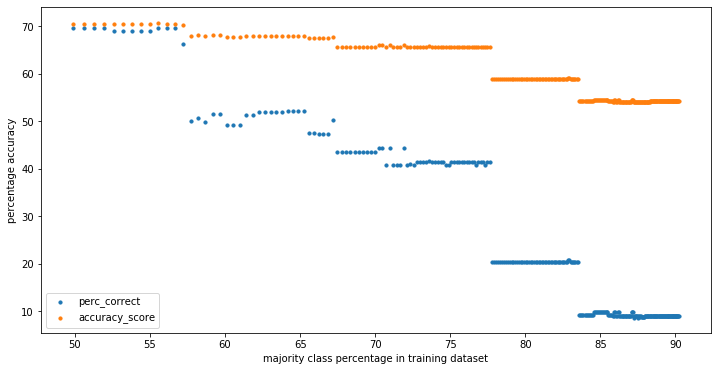

In [35]:
# Plot our data and performance

for i in range(len(sample_array)):
    sample_array[i] = sample_array[i]*100/(7038+sample_array[i])
plt.figure(figsize = (12,6))
plt.scatter(sample_array, perc_correct_array, s = 10, label = 'perc_correct')
plt.scatter(sample_array, accuracy_score_array, s = 10, label = 'accuracy_score')
plt.ylabel('percentage accuracy')
plt.xlabel('majority class percentage in training dataset')
plt.legend(loc = 'lower left')

plt.show()

In [37]:
# Train on segments of the data and get accuracies

perc_array = []
acc_array = []
iteration_array = []
iteration = 0

for i in range(1,len(dfu_1)-10000,10000):
    iteration +=1
    start = i
    end = i+10000

    dfu_11 = dfu_temp1.iloc[start:end]
    y_train1 = dfu_11['case_status'].values
    X_train1 = dfu_11.drop(columns = ['case_status']).values
    
    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]
    
    y_true = y_tds
    clf_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)
    y_pred = clf_DT.predict(X_tds)
    acc_array.append(100*accuracy_score(y_true, y_pred))
    perc_array.append(perc_correct(y_true, y_pred))
    iteration_array.append(iteration)

In [38]:
# Get accuracies of our training with segments of data

pd.DataFrame({"iter": iteration_array, "accuracy score": acc_array, "percentage correct": perc_array})

,iter,accuracy score,percentage correct
0,1,44.823001,75.836924
1,2,54.695031,67.417965
2,3,54.362639,66.755055
3,4,54.462357,66.920782
4,5,56.523184,75.472324
5,6,61.941167,87.272125
6,7,61.974406,87.139543


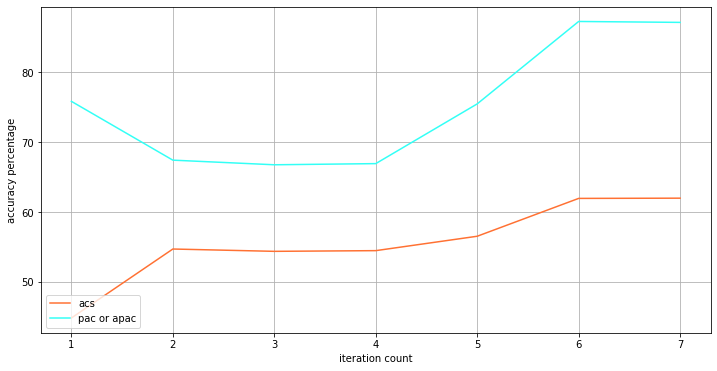

In [62]:
# Plot those accuracies

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(iteration_array, acc_array, label = 'acs', color = '#ff7133')
plt.plot(iteration_array, perc_array, label = 'pac or apac', color = '#33fff6')

plt.legend(loc = 'lower left')
plt.ylabel('accuracy percentage')
plt.xlabel('iteration count')
plt.show()

In [39]:
clf_model = []

for i in range(1,len(dfu_1)-10000,10000):
    iteration +=1
    start = i
    end = i+10000

    dfu_11 = dfu_temp1.iloc[start:end]
    y_train1 = dfu_11['case_status'].values
    X_train1 = dfu_11.drop(columns = ['case_status']).values

    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]
    
    clf_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)
    clf_model.append(clf_DT)

In [42]:
y_true = y_tds
pred_array = []
for i in range(len(clf_model)):
    y_pred = clf_model[i].predict(X_tds)
    pred_array.append(y_pred)

In [52]:
probability_0 = []
for i in range(len(X_tds)):
    count_0 = 0
    count_1 = 0
    for j in range(len(pred_array)):
        if pred_array[j][i] == 0:
            count_0+=1
        else:
            count_1 +=1
    probability_0.append(count_0/7)

In [58]:
y_predict_all = []
for p in np.arange(0.5,1,0.1):
    y_predict = []
    for i in range(len(probability_0)):
        if probability_0[i]>p:
            y_predict.append(0)
        else:
            y_predict.append(1)
    y_predict_all.append(y_predict)

In [60]:
p_acc_array = []
p_perc_array = []
for i in range(len(y_predict_all)):
    p_acc_array.append(100*accuracy_score(y_true, y_predict_all[i]))
    p_perc_array.append(perc_correct(y_true, y_predict_all[i]))

pd.DataFrame({"p": [0.5, 0.6, 0.7, 0.8, 0.9], "accuracy score": p_acc_array, "perc_correct_score":p_perc_array})

,p,accuracy score,perc_correct_score
0,0.5,50.141266,100.000000
1,0.6,64.018614,56.015910
2,0.7,64.018614,56.015910
3,0.8,66.245637,54.192907
4,0.9,57.952468,16.605900


In [63]:
print('shivam mishra')

shivam mishra
